# NoteBook to make Figures for Dec 4 Meeting

#### Dependencies

In [1]:
from rasterstats import zonal_stats, gen_zonal_stats
import numpy as np
import pandas as pd
import geopandas as gpd
import rasterio
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
### File Paths on ERI's Tana
data_dir = "/home/cascade/tana-crunch-cascade/projects/wastewater_data/"
data_out = os.path.join(data_dir, 'effluent_output/')
basins_dir = os.path.join(data_dir, "basins_laea/")

#output_fn = os.path.join(data_out, "pour_point_totals_sub.shp")

In [3]:
### Open file
FIO_FN = 'FIO_pour_point_totals_sub.shp'
FIO_df = gpd.read_file(data_out+FIO_FN)

In [4]:
print(len(FIO_df))
FIO_df.head()

59327


,basin_id,area,FIO_high,FIO_high_p,FIO_high_a,SUM_FERTC,SUM_PESTC,SUM_IMPV,geometry
0,na_09383,34.627364,70.778708,3.726336e-08,2.044011,0.0,0.0,0.0,POINT (-1101796.448163523 7815841.140043127)
1,na_09414,28.552388,31.919943,1.680512e-08,1.117943,0.0,0.0,0.0,POINT (-1099349.34161873 7812452.503205401)
2,na_16095,61.357259,161.150615,8.484209e-08,2.626431,0.0,0.0,0.0,POINT (-8893351.530068099 7634545.820950445)
3,na_16536,15.794938,42.273102,2.225582e-08,2.676370,0.0,0.0,0.0,POINT (-8353458.69405241 7751174.144379272)
4,na_16559,27.944890,19.771588,1.040929e-08,0.707521,0.0,0.0,0.0,POINT (-2620299.671990714 8355910.856713424)


In [5]:
N_FN = 'Nitrogen_pour_point_totals_sub.shp'
N_df = gpd.read_file(data_out+N_FN)

In [6]:
N_df.head()

,basin_id,area,Nitrogen,Nitrogen_p,Nitrogen_a,SUM_FERTC,SUM_PESTC,SUM_IMPV,geometry
0,na_09140,46.777316,3.404402,1.230000e-13,0.072779,0.0,0.0,0.0,POINT (-1678537.217322783 8704813.583956907)
1,na_09165,25.514900,1.687432,6.100000e-14,0.066135,0.0,0.0,0.0,POINT (-1698003.822905881 8708577.800324751)
2,na_09181,43.132331,3.315784,1.200000e-13,0.076875,0.0,0.0,0.0,POINT (-1687833.799843368 8699026.909663213)
3,na_09197,27.337393,2.592072,9.400000e-14,0.094818,0.0,0.0,0.0,POINT (-1697987.213918456 8706611.021538621)
4,na_09245,18.224928,1.779742,6.400000e-14,0.097654,0.0,0.0,0.0,POINT (-1709013.960542178 8705431.54202709)


# FIO v N

In [7]:
data = pd.merge(FIO_df[['basin_id','FIO_high']], N_df[['basin_id','Nitrogen']], on = 'basin_id',
               how = 'inner')

In [8]:
data.head()

,basin_id,FIO_high,Nitrogen
0,na_09383,70.778708,1.406173e+06
1,na_09414,31.919943,6.388205e+05
2,na_16095,161.150615,2.330933e+06
3,na_16536,42.273102,6.395194e+05
4,na_16559,19.771588,3.662405e+05


Text(0, 0.5, 'N Total (grams)')

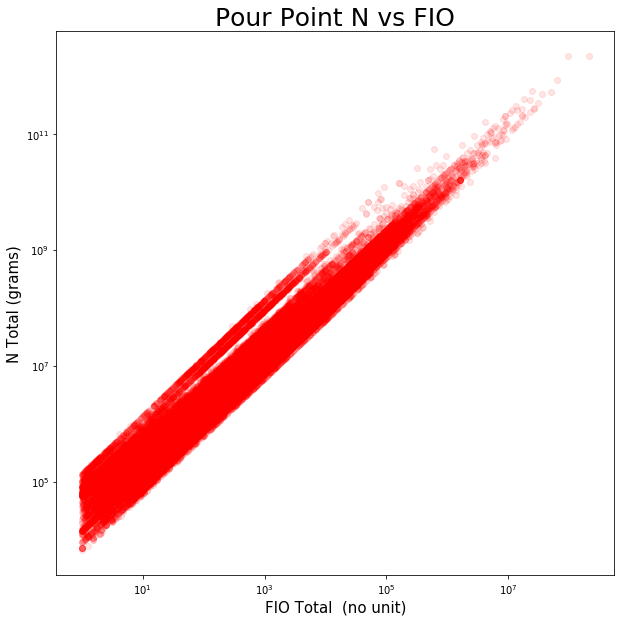

In [9]:
fig, ax1 = plt.subplots(nrows=1, ncols=1,  figsize=(10, 10))

plt.scatter(data['FIO_high'], data['Nitrogen'], alpha = 0.1, color = 'Red')
plt.xscale('log')
plt.yscale('log')

plt.title('Pour Point N vs FIO', fontsize = 25)
plt.xlabel('FIO Total  (no unit)', fontsize = 15)
plt.ylabel('N Total (grams)', fontsize = 15)

# FIO v N Area

In [10]:
data = pd.merge(FIO_df[['basin_id','FIO_high_a']], N_df[['basin_id','Nitrogen_a']], on = 'basin_id',
               how = 'inner')

In [11]:
data.head()

,basin_id,FIO_high_a,Nitrogen_a
0,na_09383,2.044011,40608.717171
1,na_09414,1.117943,22373.628984
2,na_16095,2.626431,37989.518030
3,na_16536,2.676370,40488.880643
4,na_16559,0.707521,13105.812538


Text(0, 0.5, 'N Total (grams) / km2')

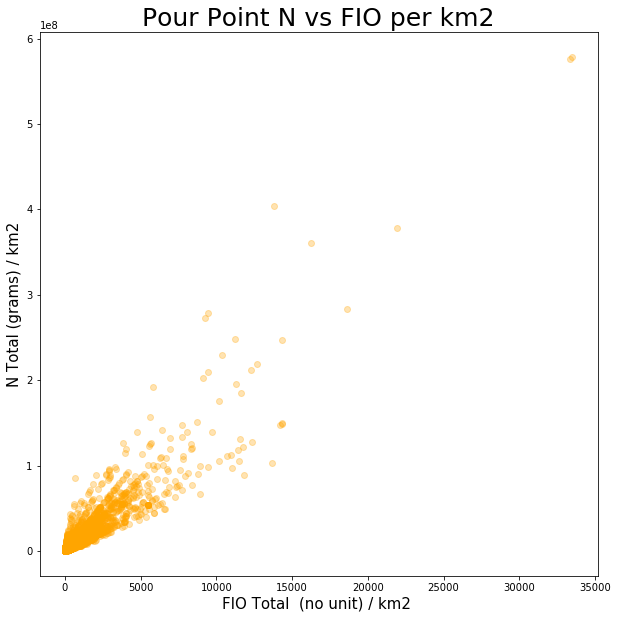

In [12]:
fig, ax1 = plt.subplots(nrows=1, ncols=1,  figsize=(10, 10))

plt.scatter(data['FIO_high_a'], data['Nitrogen_a'], alpha = 0.3, color = 'Orange')
# plt.xscale('log')
# plt.yscale('log')

plt.title('Pour Point N vs FIO per km2', fontsize = 25)
plt.xlabel('FIO Total  (no unit) / km2 ', fontsize = 15)
plt.ylabel('N Total (grams) / km2', fontsize = 15)

# Lorenz Curve

Text(0, 0.5, 'Cumlative Impact (% of total)')

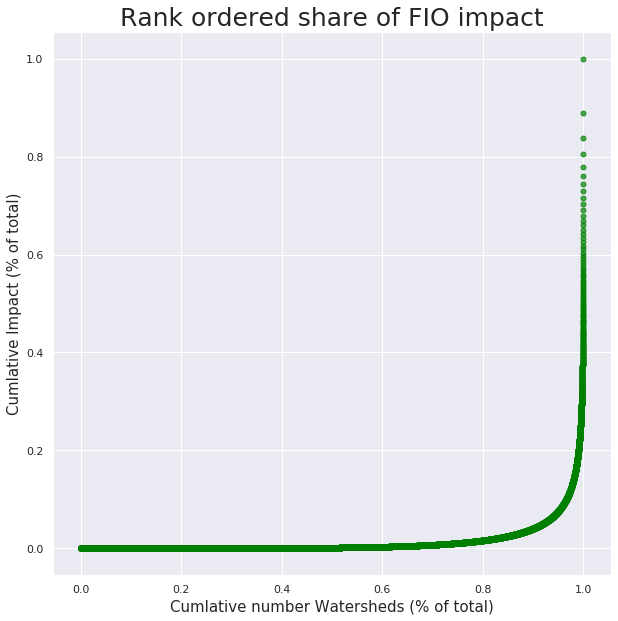

In [13]:
X = np.sort(np.array(FIO_df['FIO_high']))

# Data for curve one
X_lorenz = X.cumsum() / X.sum()
X_lorenz = np.insert(X_lorenz, 0, 0)
X_lorenz[0], X_lorenz[-1]

sns.set(font_scale=1)
fig, ax1 = plt.subplots(nrows=1, ncols=1,  figsize=(10, 10))
ax1.scatter(np.arange(X_lorenz.size)/(X_lorenz.size-1), X_lorenz, 
           marker='.', color='Green', s=100, alpha = 0.7)

plt.title('Rank ordered share of FIO impact', fontsize = 25)
plt.xlabel('Cumlative number Watersheds (% of total)', fontsize = 15)
plt.ylabel('Cumlative Impact (% of total)', fontsize = 15)

Text(0, 0.5, 'Cumlative Impact (% of total)')

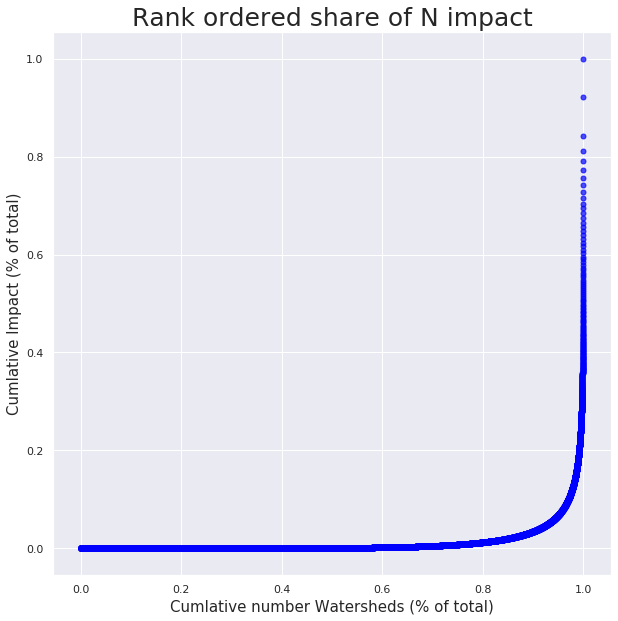

In [14]:
X = np.sort(np.array(N_df['Nitrogen']))

# Data for curve one
X_lorenz = X.cumsum() / X.sum()
X_lorenz = np.insert(X_lorenz, 0, 0)
X_lorenz[0], X_lorenz[-1]

sns.set(font_scale=1)
fig, ax1 = plt.subplots(nrows=1, ncols=1,  figsize=(10, 10))
ax1.scatter(np.arange(X_lorenz.size)/(X_lorenz.size-1), X_lorenz, 
           marker='.', color='Blue', s=100, alpha = 0.7)

plt.title('Rank ordered share of N impact', fontsize = 25)
plt.xlabel('Cumlative number Watersheds (% of total)', fontsize = 15)
plt.ylabel('Cumlative Impact (% of total)', fontsize = 15)

# Pct Impact FIO 

In [15]:
FIO_df['FIO_high_pct'] = FIO_df['FIO_high'] / FIO_df['FIO_high'].sum() 

In [16]:
order = range(0, len(FIO_df['FIO_high_pct']))

In [17]:
data = FIO_df['FIO_high_pct'].sort_values() 

Text(0, 0.5, 'Effluent Pct of Global Total')

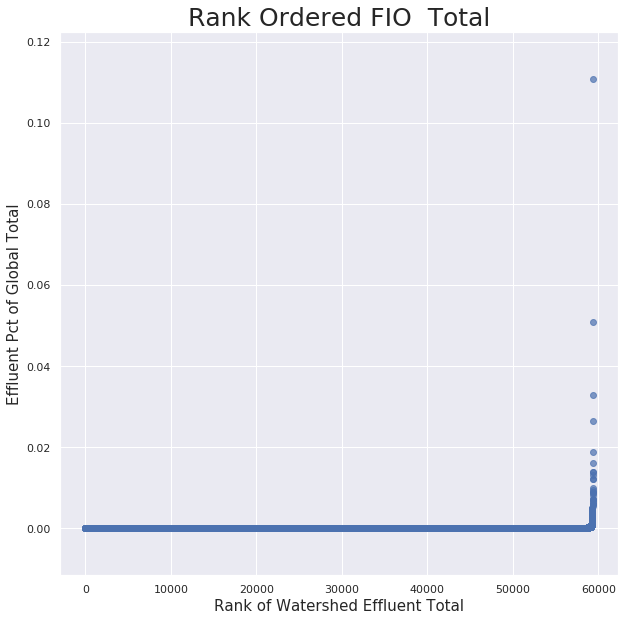

In [18]:
sns.set(font_scale=1)
fig, ax1 = plt.subplots(nrows=1, ncols=1,  figsize=(10, 10))
plt.scatter(order, data, alpha = 0.7)
#plt.axis([0, 6*10**4, 0, 0.003])
plt.title('Rank Ordered FIO  Total', fontsize = 25)
plt.xlabel('Rank of Watershed Effluent Total', fontsize = 15)
plt.ylabel('Effluent Pct of Global Total', fontsize = 15)
#plt.xscale('log')

# Impact by Area

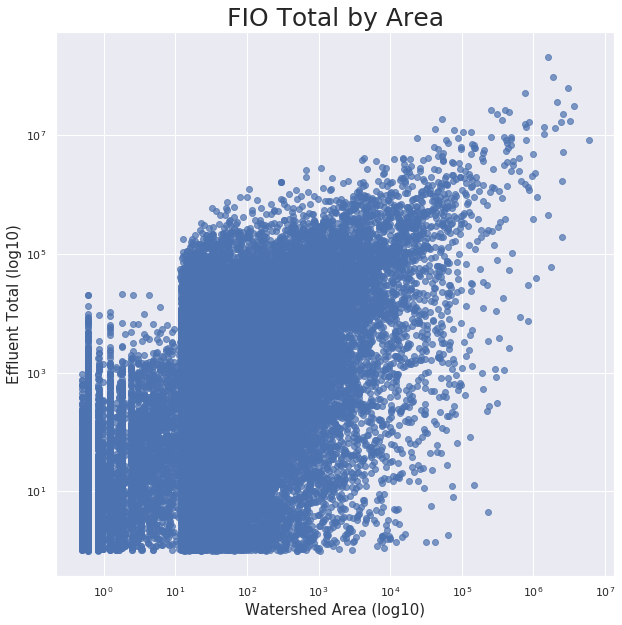

In [19]:
sns.set(font_scale=1)
fig, ax1 = plt.subplots(nrows=1, ncols=1,  figsize=(10, 10))
plt.scatter(FIO_df['area'], FIO_df['FIO_high'], alpha = 0.7)
#plt.axis([0, 6*10**4, 0, 0.003])
plt.title('FIO Total by Area', fontsize = 25)
plt.xlabel('Watershed Area (log10)', fontsize = 15)
plt.ylabel('Effluent Total (log10)', fontsize = 15)
plt.yscale('log')
plt.xscale('log')

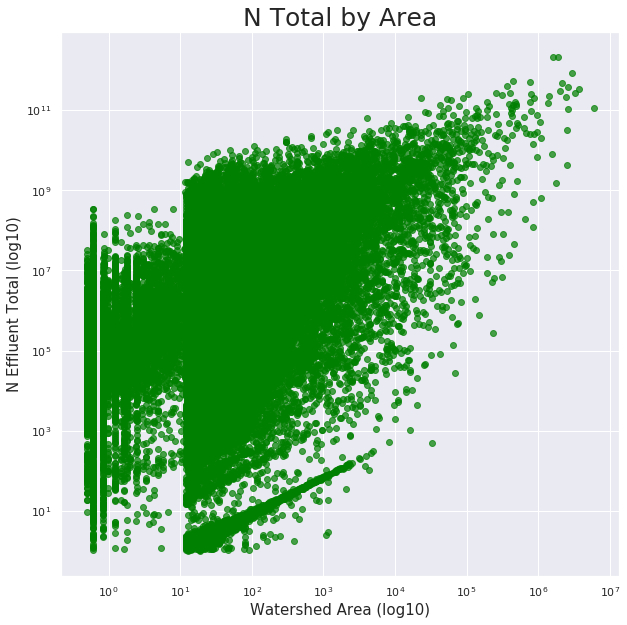

In [20]:
sns.set(font_scale=1)
fig, ax1 = plt.subplots(nrows=1, ncols=1,  figsize=(10, 10))
plt.scatter(N_df['area'], N_df['Nitrogen'], alpha = 0.7, color = 'Green')
#plt.axis([0, 6*10**4, 0, 0.003])
plt.title('N Total by Area', fontsize = 25)
plt.xlabel('Watershed Area (log10)', fontsize = 15)
plt.ylabel('N Effluent Total (log10)', fontsize = 15)
plt.yscale('log')
plt.xscale('log')

# Old Code

In [ ]:
data = ef_sub['effluent_s']

In [ ]:
total = data.sum()

In [ ]:
data_pct = data / total

In [ ]:
order = range(0, len(data_pct))

In [ ]:
len(data.sort_values())

In [ ]:
plt.scatter(order, data_pct.sort_values())
#plt.yscale('log')
#plt.xscale('log') 
plt.axis([5*10**4, 6*10**4, 0, 0.15])

In [ ]:
data_pct.sort_values().tail(50)

In [ ]:
plt.plot(data_pct)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
plt.hist(data, bins = 10000, color = 'Orange', edgecolor = 'Orange', cumulative = True)
plt.yscale('log')
#plt.xscale('log') 
plt.axis([0, 10**8, 0, 10**5])

In [ ]:
x = data.sort_values()
n = x.size
y = np.arange(1, n + 1) / n

In [ ]:
y

In [ ]:
plt.scatter(x=x, y=y)
#plt.yscale('log')
#plt.axis([0, max(x), 0.000001, 1])
plt.xlabel('FIO Impact by Watershed')
plt.ylabel('P[$l \leq L$]')
plt.title('Distribution of FIOs Impacts')

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
n, bins, patches = ax.hist(np.log10(ef_sub['effluent_s']), density=True, histtype='step',
                           cumulative=True, label='Empirical')


In [ ]:
import seaborn as sns

sns.distplot(ef_sub['effluent_s'], hist=True, kde=True, bins=int(180/5), color = 'darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})

In [ ]:
def lorenz_curve(X):
    
    """Function plots Lorenz curves based on https://zhiyzuo.github.io/Plot-Lorenz/"""
    X_lorenz = X.cumsum() / X.sum()
    X_lorenz = np.insert(X_lorenz, 0, 0) 
    X_lorenz[0], X_lorenz[-1]
    fig, ax = plt.subplots(figsize=[6,6])
    ## scatter plot of Lorenz curve
    ax.scatter(np.arange(X_lorenz.size)/(X_lorenz.size-1), X_lorenz, 
               marker='x', color='darkgreen', s=100)
    ## line plot of equality
    ax.plot([0,1], [0,1], color='k')

In [ ]:
X = np.sort(np.array(ef_sub['effluent_s']))

# Data for curve one
X_lorenz = X.cumsum() / X.sum()
X_lorenz = np.insert(X_lorenz, 0, 0)
X_lorenz[0], X_lorenz[-1]

sns.set(font_scale=1)
fig, ax1 = plt.subplots(nrows=1, ncols=1,  figsize=(10, 10))
ax1.scatter(np.arange(X_lorenz.size)/(X_lorenz.size-1), X_lorenz, 
           marker='.', color='Green', s=100, alpha = 0.7)

plt.title('Rank ordered share of impact', fontsize = 25)
plt.xlabel('Cumlative number Watersheds (% of total)', fontsize = 15)
plt.ylabel('Cumlative Impact (% of total)', fontsize = 15)